# MESA Stellar Structure Modeling
Kevin Kearney | RIT Astrophysical Science and Technology (AST) | kjk9308@g.rit.edu 

## MESA Desktop vs MESA-Web
Installing and running MESA isn’t a straightforward task; its a complex piece of software, and requires a fair bit of computer expertise to use. Arizona State University created a web-based interface to MESA, called MESA-Web. This interface allows you to set up various parameters (e.g., the stellar mass) and then submit a calculation to a computer running MESA.  Below are some links to understanding and using MESA/MESA-Web.

Good tutorial [University of Wisconson Astronomy](http://user.astro.wisc.edu/~townsend/resource/teaching/astro-310-F19/python-lab/mesa-web-intro.html).  This notebook is based on the tutorial.   
Primary Publication [Modules for Experiments in Stellar Astrophysics (MESA)](https://ui.adsabs.harvard.edu/abs/2011ApJS..192....3P/abstract)  

**MESA-Web Site**  
[Calculation Submission](http://user.astro.wisc.edu/~townsend/static.php?ref=mesa-web-submit)  
[Explaining the Input Parameters](http://user.astro.wisc.edu/~townsend/static.php?ref=mesa-web-input)  
[Explaining the Output](http://user.astro.wisc.edu/~townsend/static.php?ref=mesa-web-output)

## Using the `mesa_web.py` module to analyze MESA output data  
This notebook shows how to extract information from a MESA code run.  It is detailed and verbose (prints a lot of stuff out).  It is based on a tutorial from [University of Wisconson Astronomy](http://user.astro.wisc.edu/~townsend/resource/teaching/astro-310-F19/python-lab/python-mesa-web.html).  

The notebook requires (imports) the `mesa_web.py` module, which can be downloaded from [here](http://user.astro.wisc.edu/~townsend/resource/teaching/astro-310-F19/python-lab/mesa_web.py).  Put that module in the same directory as this notebook file. The `mesa_web.py` module was provided by the same group who developed MESA-Web, however, there should be no difference in the output from the installed version of `MESA` vs. `MESA-Web`.  

You will also need a folder of output from your MESA run (if you used MESA-Web you receieved it by e-mail and have unzipped it); it will have a name like `MESA-Web_Job_11082321376`, with a different 11-digit number.  Place that folder in the same location as this notebook file.  A sample folder is provided with this notebook, and you might want to run through the whole notebook first with the known-good example data set.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import re                 # regex
import pprint
%matplotlib inline
import mesa_web as mw    # python module (file): should be placed in the same directory as this notebook

### Set up the path to your MESA run folder
We use the pathlib module to maintain platform independence.  Again, the assumption is that the MESA run folder is in the current working directory (along with this Python notebook). 

In [40]:
# first ever MESA-Web_Job_11082321376
# 0.5M  MESA-Web_Job_11222321846
# 1.0M  MESA-Web_Job_11222321848
# 15M   MESA-Web_Job_11222321850
mesaPath = Path.cwd() / 'MESA-Web_Job_11222321848'   # PUT YOUR MESA filename here (just change the 11-digit run number)
print(mesaPath)

C:\Users\KevinKearney\code\MESA_StellarModeling\MESA-Web_Job_11222321848


## Access the MESA configuration information
MESA saves your run configuration in file `input.txt`.  We can read that into a `DICT` for later use (for instance, labeling a plot).  

In [41]:
mesaIndex = mesaPath / 'input.txt'
f = open(mesaIndex, 'r')
mesaConfig = {}

# First line requires special handling to extract the run number
first_line = f.readline()
job = re.search(r'\d{11}', first_line)
mesaConfig['Job'] = job.group(0).strip()

# Pull out the rest of the key:value pairs
for line in f:
    listedline = line.strip().split(':', 1) # split around the = sign
    if len(listedline) > 1: # we have the = sign in there
        #print(listedline[0].strip(), listedline[1].strip())
        mesaConfig[listedline[0].strip()] = listedline[1]  #.strip()
        
# Show it
mesaConfig

{'Job': '11222321848',
 'Initial Mass': ' 1 (solar mass)',
 'Nuclear Reaction Network': ' basic.net',
 'Sampled Nuclear Reaction': ' none',
 'Initial Metallicity': ' 0.02',
 'Mixing Length Alpha': ' 2.0',
 'Mixing Length Theory Implementation': ' Cox',
 'Convective Overshoot f': ' 0.0001',
 'Convective Overshoot f0': ' 0.0005',
 'Semi-Convection Alpha': ' 0.01',
 'Thermohaline Alpha': ' 1.0',
 'Thermohaline Mixing Implementation': ' Kippenhahn',
 'Convective Premixing': ' .false.',
 'Red Giant Branch Wind Scheme': ' Reimers',
 'RGB Wind Scaling Factor': ' 0.1',
 'Asymptotic Giant Branch Wind Scheme': ' Blocker',
 'AGB Wind Scaling Factor': ' 0.1',
 'Initial Rotational Value': ' 0.0 (omega_initial/omega_critical)',
 'Variance Control Target': ' 1e-2',
 'Mesh Delta Coefficient': ' 2.0',
 'dX_nuc_drop_min_X_limit': ' 1e-2',
 'MESA Release': ' r12778',
 'Your model completed, reporting the following stopping reason': ''}

## Access the History Data
The single `history.data` file contains the basic stellar parameters with time.  It is BIG, and will take a few seconds to read in.  
**NOTE:  there is some ambiguity in the MESA documenatation as to the name of the history file.**  Our runs produce a file called `trimmed_history.data`.  If that is not the case, just modify the first line of code below.  

In [42]:
mesaHistory = mesaPath / 'trimmed_history.data'
# mesaHistory = mesaPath / 'history.data'       # uncomment if this is the name of the file
hist_data = mw.read_history(mesaHistory)

In [43]:
# The data is returned as a dict, and we can inspect the available keys
for k in hist_data.keys():  print(k)

version_number
compiler
build
MESA_SDK_version
math_backend
date
burn_min1
burn_min2
model_number
star_age
star_mass
log_L
log_R
log_Teff
log_center_T
log_center_Rho
log_center_P
center_h1
center_he3
center_he4
center_c12
center_n14
center_o16
center_ne20
center_mg24
center_si28
center_s32
center_ar36
center_ca40
center_ti44
center_cr48
center_fe52
center_fe54
center_fe56
center_ni56
center_degeneracy
center_ye
center_entropy
compactness_parameter
dynamic_timescale
kh_timescale
nuc_timescale
pp
cno
tri_alfa
log_LH
log_LHe
log_LZ
log_Lneu
he_core_mass
c_core_mass
o_core_mass
si_core_mass
fe_core_mass
he_core_radius
c_core_radius
o_core_radius
si_core_radius
fe_core_radius
max_abs_v_velocity
surf_avg_omega_div_omega_crit
log_total_angular_momentum
surf_avg_omega
surf_avg_v_rot
star_mdot


In [44]:
# Extract some data from hist_data, using dict indexing

print('MESA_SDK_version: ', hist_data['MESA_SDK_version'])
print('Number of time steps: ', len(hist_data['log_Teff'])) # they are all the same length, so just pick one
print('log_Teff: ', hist_data['log_Teff'][0:3])             # print the first few entries
print('log_L: ', hist_data['log_L'][0:3])                   # print the first few entries

log_Teff = hist_data['log_Teff'] # log(Teff/K)
log_L = hist_data['log_L']       # log(L/Lsun)

MESA_SDK_version:  "x86_64-linux-20.3.2"
Number of time steps:  331
log_Teff:  [3.65513531 3.65435121 3.65346644]
log_L:  [2.51063932 2.50744726 2.503843  ]


#### HR Diagram

We will plot an HR diagram, but first we are going to calculate where the sun would fall so we can overplot that as well

In [47]:
# Extract log(LH) from hist_data and Find the index where log(LH) is closest to zero (i.e., LH closest to 1 Lsun), 
# as representative of the present-day Sun.

log_LH = hist_data['log_LH']
i_pres = np.argmin(np.abs(log_LH))  # np.argmin() returns the index of the smallest element

# Print out values at this index
print('Model number corresponding to present-day sun: ', i_pres)
print('log(L_H) at present     :', log_LH[i_pres])
print('log(L) at present       :', log_L[i_pres])
print('log(Teff) at present    :', log_Teff[i_pres])
print('log(R) at present       :', hist_data['log_R'][i_pres])

Model number corresponding to present-day sun:  296
log(L_H) at present     : 0.0014776474900238593
log(L) at present       : 0.0013869129890517798
log(Teff) at present    : 3.760053373239956
log(R) at present       : 0.0038455464672398935


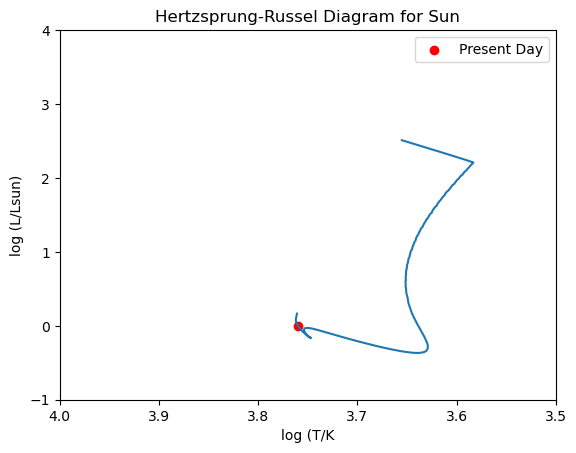

In [46]:
plt.figure()

plt.plot(log_Teff, log_L)

plt.xlim(4.0, 3.5)
plt.ylim(-1,4)

plt.xlabel('log (T/K')
plt.ylabel('log (L/Lsun)')

plt.title('Hertzsprung-Russel Diagram for Sun')

plt.scatter(log_Teff[i_pres], log_L[i_pres], color='r', label='Present Day')
plt.legend()

### Hydrogen Depletion / Helium Enrichment

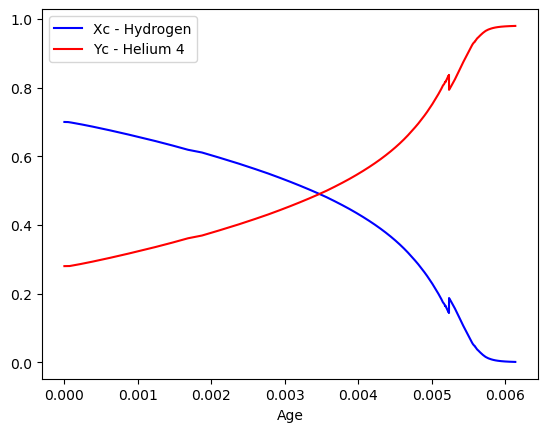

In [39]:
# Plot central hydrogen abundance versus age (measured since the start of the calculation)

X_c = hist_data['center_h1']
Y_c = hist_data['center_he4']
age = hist_data['star_age']

plt.figure()

plt.plot(age/1E9, X_c, color='b', label='Xc - Hydrogen')
plt.plot(age/1E9, Y_c, color='r', label='Yc - Helium 4')

plt.xlabel('Age')

plt.legend()

## Access the Profile Data  
These files provide snapshots of the full internal structure of the model star — i.e., variables such as radial coordinate 𝑟, interior mass 𝑚, temperature 𝑇 — at selected stages during its evolution.  Profiles are NOT saved for every model (they seem to be saved for about every 50 models, but I think this may vary depending on how fast models are changing). 

The profile data files are named `profileNNN.data`, and they are indexed in file `profiles.index` (basically, a lookup table).  This has three columns.  The first column lists model numbers for which profile files exist; and the third column gives the profile index number (don’t worry about the second column for now). Hence, you must scan the 'profiles.index' file for the model NEAREST your desired model, and from that find the profile index number (col 3) that matches.   

To pick a profile to read, let’s demonstrate the process for the present-day Sun. First, find the model number corresponding to the index `i_pres` determined previously:

In [23]:
print('Model number corresponding to present-day sun: ', i_pres)

Model number corresponding to present-day sun:  313


We need to find the model number that’s *closest* to the model number we've identified, and then read off the corresponding profile index. For instance, in the the sample MESA folder (provided with this notebook) we calculated (above) that model closest to the present-day sun was **10078**.  Open `profiles.data` in a text editor and scan it.  A snippet of the sample `profiles.dat` table shown below; we see that the nearest model is 10100, with corresponding profile index (col 3)  **208**:  

       10000           2         206
       10050           1         207
       10100           1         208
       10150           1         209
       10200           1         210  

### Access a profile by its index number
As was the case with `hist_data`, we see that `prof_data` is a dict containing many key/value pairs

In [12]:
mesaProfile = mesaPath / 'profile208.data'    #Change to your desired index number
prof_data = mw.read_profile(mesaProfile)

# Show all the keys available in the profile
for k in prof_data.keys():  print(k)

model_number
num_zones
initial_mass
initial_z
star_age
time_step
Teff
photosphere_L
photosphere_r
center_eta
center_h1
center_he3
center_he4
center_c12
center_n14
center_o16
center_ne20
star_mass
star_mdot
star_mass_h1
star_mass_he3
star_mass_he4
star_mass_c12
star_mass_n14
star_mass_o16
star_mass_ne20
he_core_mass
c_core_mass
o_core_mass
si_core_mass
fe_core_mass
neutron_rich_core_mass
tau10_mass
tau10_radius
tau100_mass
tau100_radius
dynamic_time
kh_timescale
nuc_timescale
power_nuc_burn
power_h_burn
power_he_burn
power_neu
burn_min1
burn_min2
time_seconds
version_number
compiler
build
MESA_SDK_version
math_backend
date
mass
radius
luminosity
pressure
logRho
logT
energy
entropy
cp
gamma1
grada
mu
free_e
ye
pgas
prad
gradr
gradT
velocity
conv_vel
opacity
eps_nuc
pp
cno
tri_alfa
eps_nuc_neu_total
non_nuc_neu
eps_grav
h1
he3
he4
c12
n14
o16
ne20
mg24
si28
s32
ar36
ca40
ti44
cr48
fe52
fe54
fe56
ni56
eta
log_omega
v_rot
j_rot
dynamo_log_B_r
dynamo_log_B_phi
log_D_conv
log_D_semi
log_D_ovr

### Plot a profile  
First, a simple plot showing how the pressure, density and temperature vary as a function of fractional radius 𝑟/𝑅
 throughout the star:

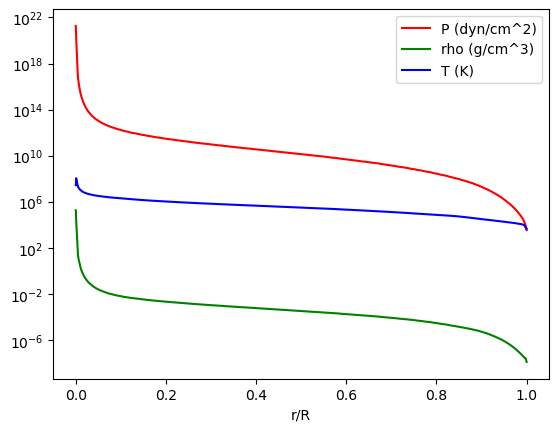

In [13]:
# Define constants

RSUN = 6.957E10 # Solar radius, in cm
MSUN = 1.989E33 # Solar mass, in g

# Plot pressure, density and temperature versus fractional radius

P = prof_data['pressure']
rho = 10**prof_data['logRho']
T = 10**prof_data['logT']

r = prof_data['radius']*RSUN        # Convert radii to cm
R = prof_data['photosphere_r']*RSUN # Same

plt.figure()

plt.plot(r/R, P, color='r', label='P (dyn/cm^2)')
plt.plot(r/R, rho, color='g', label='rho (g/cm^3)')
plt.plot(r/R, T, color='b', label='T (K)')

plt.xlabel('r/R')

plt.yscale('log')

plt.legend()

### Plot abundances versus fractional mass
We’re not limited to having radius on the horizontal axis; we can use any variable we like. Here a plot of the hydrogen, helium, carbon and nitrogen mass fractions versus fractional mass 𝑚/𝑀:

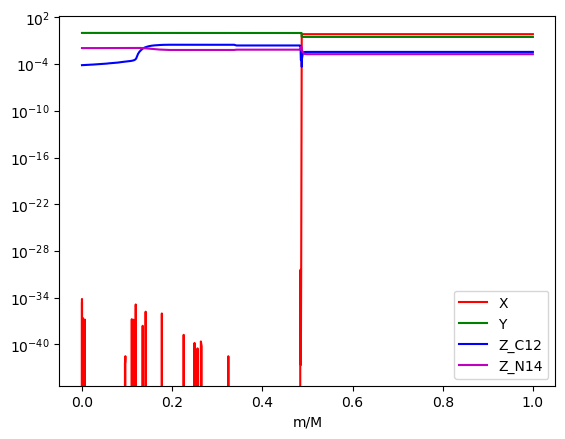

In [14]:
# Plot abundances versus fractional mass

X = prof_data['h1']
Y = prof_data['he4']
Z_C12 = prof_data['c12']
Z_N14 = prof_data['n14']

m = prof_data['mass']*MSUN      # Convert masses to g
M = prof_data['star_mass']*MSUN # Same

plt.figure()

plt.plot(m/M, X, color='r', label='X')
plt.plot(m/M, Y, color='g', label='Y')
plt.plot(m/M, Z_C12, color='b', label='Z_C12')
plt.plot(m/M, Z_N14, color='m', label='Z_N14')

plt.xlabel('m/M')

plt.yscale('log')

plt.legend()

## Analyze a profile  
let’s see if we can confirm that the model for the present-day Sun satisfies the hydrostatic equilibrium equation

d𝑃d𝑟=−𝐺𝑚𝑟2𝜌.
First, let’s calculate the left-hand and right-hand sides of this equation. To evaluate the pressure gradient, we can use the np.gradient function, which uses finite differences to evaluate a numerical gradient estimate:

In [15]:
# Define constants

G = 6.674E-8 # Gravitational constant, in cm^3/g/s^2

# Evaluate lhs and rhs of the hydrostatic equilibrium equation

lhs = np.gradient(P, r)

rhs = -G*m/r**2 * rho

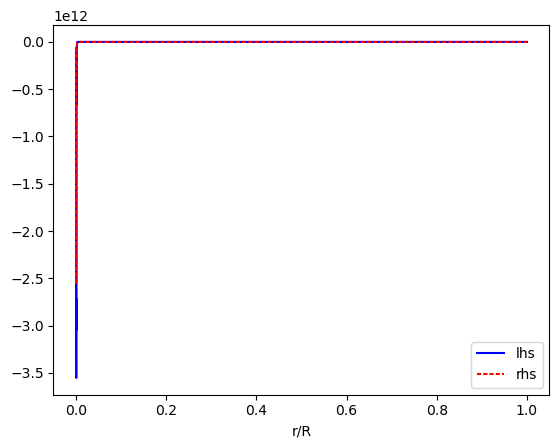

In [27]:
# Plot the lhs and rhs of the hydrostatic equilibrium equation

plt.figure()

plt.plot(r/R, lhs, color='b', label='lhs')
plt.plot(r/R, rhs, color='r', label='rhs', dashes=(2,1))

plt.xlabel('r/R')

plt.legend()

### Autmatically Search the profile index

Automate the process of looking up the nearest model to a target model, extracting the profile number, and opening it.  We open `profiles.index` and read it into a `dataframe`, then search the dataframe for the nearest model to our target model, then use that to extract the corresponding profile.  

For a target model, we'll re-do the calculation from way above to find a model closest to the present-day sun:

In [88]:
log_LH = hist_data['log_LH']
target_model = np.argmin(np.abs(log_LH))  # np.argmin() returns the index of the smallest element
print('Model number corresponding to present-day sun: ', target_model)

Model number corresponding to present-day sun:  10078


In [89]:
# Read the index file into a Pandas dataframe
mesaIndex = mesaPath / 'profiles.index'
colnames=['Model', 'X', 'Profile'] 
profile_df = pd.read_csv(mesaIndex, delim_whitespace=True,skiprows=[0], names=colnames, header=None)
profile_df.head()

,Model,X,Profile
0,1,2,1
1,50,1,2
2,100,1,3
3,150,1,4
4,200,1,5


In [90]:
# Find nearest row in the dataframe corresponding
df_closest = profile_df.iloc[(profile_df['Model']-target_model).abs().argsort()[:1]]
df_closest

,Model,X,Profile
207,10100,1,208


In [91]:
#  Extract the Profile.  Currently a dog's breakfast of code, but it works.  Elegance to come.
pnum=str(df_closest['Profile'].tolist()[0])

In [92]:
# Create the filename and read in the specific profile for nearest target model:
p_file = 'profile' + pnum + '.data'
mesaProfile = mesaPath / p_file    #Change to your desired index number

prof_data = mw.read_profile(mesaProfile)

In [93]:
print('Length of profile (show success):', len(prof_data))

Length of profile (show success): 108
